In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Part 1
interest = ['DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']
stock1 = 'GLD'
stock2 = '^HSI'

start = '2019-10-01'
end = '2019-11-30'

# Import your gold ETF prices for the months of October 2019 and November 2019
GLD = pdr.DataReader(stock1,'yahoo', start, end)

# Import your equity ETF price for the months of October 2019 and November 2019

HSI = pdr.DataReader(stock2,'yahoo', start, end)
yc = pdr.DataReader(interest,'fred',start, end)

names = dict(zip(interest, ['2yr', '3yr', '5yr', '7yr', '10yr','30yr']))
yc = yc.rename(columns=names)

# Import closing daily interest rates of the 6 active benchmarks of US Treasury yields, for the months of October 2019 and November 2019 (approximately 40 - 45 data points).  You will likely use 2-year, 3-year, 5-year, 7-year, 10-year, and 30-year maturities

yc = yc[['2yr', '3yr', '5yr', '7yr', '10yr','30yr']]



In [2]:
#Part 2
# Compute the daily returns of your Gold ETF and your Equity ETF

daily_return_GLD = GLD['Close'].pct_change(1)
daily_return_HSI = HSI['Close'].pct_change(1)

print("The daily returns of the Gold ETF is shown as below \n", daily_return_GLD)
print("The daily returns of the Equity ETF is shown as below \n", daily_return_HSI)



The daily returns of the Gold ETF is shown as below 
 Date
2019-10-01         NaN
2019-10-02    0.011674
2019-10-03    0.004531
2019-10-04    0.000000
2019-10-07   -0.008527
2019-10-08    0.008743
2019-10-09    0.000916
2019-10-10   -0.008729
2019-10-11   -0.005539
2019-10-14    0.003999
2019-10-15   -0.006971
2019-10-16    0.005730
2019-10-17    0.001424
2019-10-18   -0.001067
2019-10-21   -0.004770
2019-10-22    0.002933
2019-10-23    0.002354
2019-10-24    0.007116
2019-10-25    0.002332
2019-10-28   -0.008600
2019-10-29   -0.002773
2019-10-30    0.005490
2019-10-31    0.009998
2019-11-01    0.000913
2019-11-04   -0.002876
2019-11-05   -0.016180
2019-11-06    0.004290
2019-11-07   -0.015521
2019-11-08   -0.006364
2019-11-11   -0.002402
2019-11-12    0.002700
2019-11-13    0.004002
2019-11-14    0.004204
2019-11-15   -0.002526
2019-11-18    0.002966
2019-11-19    0.000505
2019-11-20    0.000505
2019-11-21   -0.005477
2019-11-22   -0.001884
2019-11-25   -0.004792
2019-11-26    0.00481

In [3]:
#Part 3
# For the month of October, compute the average yield for each benchmark security.  Repeat the average calculation for November.
# For the month of October, compute the standard deviation for each benchmark security.  Repeat the average calculation for November.

# 2 year maturity
yc2_OCT = pdr.DataReader('DGS2','fred','2019-10-01','2019-10-31')
print("The average yield for 2-years maturity US Bond yield in October \n", yc2_OCT.mean())
print("The standard deviation of yield for 2-years maturity US Bond yield in October \n", yc2_OCT.std())

yc2_NOV = pdr.DataReader('DGS2','fred','2019-11-01','2019-11-30')
print("The average yield for 2-years maturity US Bond yield in Novmber \n", yc2_NOV.mean())
print("The standard deviation of yield for 2-years maturity US Bond yield in November \n", yc2_NOV.std())

# 3 year maturity
yc3_OCT = pdr.DataReader('DGS3','fred','2019-10-01','2019-10-31')
print("The average yield for 3-years maturity US Bond yield in October \n", yc3_OCT.mean())
print("The standard deviation of yield for 3-years maturity US Bond yield in October \n", yc3_OCT.std())

yc3_NOV = pdr.DataReader('DGS3','fred','2019-11-01','2019-11-30')
print("The average yield for 3-years maturity US Bond yield in Novmber \n", yc3_NOV.mean())
print("The standard deviation of yield for 3-years maturity US Bond yield in November \n", yc3_NOV.std())

# 5 year maturity
yc5_OCT = pdr.DataReader('DGS5','fred','2019-10-01','2019-10-31')
print("The average yield for 5-years maturity US Bond yield in October \n", yc5_OCT.mean())
print("The standard deviation of yield for 5-years maturity US Bond yield in October \n", yc5_OCT.std())

yc5_NOV = pdr.DataReader('DGS5','fred','2019-11-01','2019-11-30')
print("The average yield for 5-years maturity US Bond yield in Novmber \n", yc5_NOV.mean())
print("The standard deviation of yield for 5-years maturity US Bond yield in November \n", yc5_NOV.std())

# 7 year maturity
yc7_OCT = pdr.DataReader('DGS7','fred','2019-10-01','2019-10-31')
print("The average yield for 7-years maturity US Bond yield in October \n", yc7_OCT.mean())
print("The standard deviation of yield for 7-years maturity US Bond yield in October \n", yc7_OCT.std())

yc7_NOV = pdr.DataReader('DGS7','fred','2019-11-01','2019-11-30')
print("The average yield for 7-years maturity US Bond yield in Novmber \n", yc7_NOV.mean())
print("The standard deviation of yield for 7-years maturity US Bond yield in November \n", yc7_NOV.std())

# 10 year maturity
yc10_OCT = pdr.DataReader('DGS10','fred','2019-10-01','2019-10-31')
print("The average yield for 10-years maturity US Bond yield in October \n", yc10_OCT.mean())
print("The standard deviation of yield for 10-years maturity US Bond yield in October \n", yc10_OCT.std())

yc10_NOV = pdr.DataReader('DGS10','fred','2019-11-01','2019-11-30')
print("The average yield for 10-years maturity US Bond yield in Novmber \n", yc10_NOV.mean())
print("The standard deviation of yield for 10-years maturity US Bond yield in November \n", yc10_NOV.std())

# 30 year maturity
yc30_OCT = pdr.DataReader('DGS30','fred','2019-10-01','2019-10-31')
print("The average yield for 30-years maturity US Bond yield in October \n", yc30_OCT.mean())
print("The standard deviation of yield for 30-years maturity US Bond yield in October \n", yc30_OCT.std())

yc30_NOV = pdr.DataReader('DGS30','fred','2019-11-01','2019-11-30')
print("The average yield for 30-years maturity US Bond yield in Novmber \n", yc30_NOV.mean())
print("The standard deviation of yield for 30-years maturity US Bond yield in November \n", yc30_NOV.std())

# For the month of October, compute the average price the Gold ETF.  Repeat the average calculation for November.
# For the month of October, compute the standard deviation of the Gold ETF.  Repeat the average calculation for November.

GLD_OCT = pdr.DataReader(stock1,'yahoo','2019-10-02','2019-10-31')
GLD_NOV = pdr.DataReader(stock1,'yahoo','2019-11-02','2019-11-30')
print("The average price for the GOLD ETF in October \n", GLD_OCT['Close'].mean())
print("The standard deviation of the GOLD ETF in October \n", GLD_OCT['Close'].std())

print("The average price for the GOLD ETF in November \n", GLD_NOV['Close'].mean())
print("The standard deviation of the GOLD ETF in November \n", GLD_NOV['Close'].std())

# For the month of October, compute the average price the Equity ETF.  Repeat the average calculation for November.
# For the month of October, compute the standard deviation of the Equity ETF.  Repeat the average calculation for November.

HSI_OCT = pdr.DataReader(stock2,'yahoo','2019-10-01','2019-10-31')
HSI_NOV = pdr.DataReader(stock2,'yahoo','2019-11-01','2019-11-30')

print("The average price for HSI in October \n", HSI_OCT['Close'].mean())
print("The standard deviation of HSI in October \n", HSI_OCT['Close'].std())

print("The average price for HSI in November \n", HSI_NOV['Close'].mean())
print("The standard deviation of HSI in November \n", HSI_NOV['Close'].std())




The average yield for 2-years maturity US Bond yield in October 
 DGS2    1.551364
dtype: float64
The standard deviation of yield for 2-years maturity US Bond yield in October 
 DGS2    0.080315
dtype: float64
The average yield for 2-years maturity US Bond yield in Novmber 
 DGS2    1.612632
dtype: float64
The standard deviation of yield for 2-years maturity US Bond yield in November 
 DGS2    0.033804
dtype: float64
The average yield for 3-years maturity US Bond yield in October 
 DGS3    1.528182
dtype: float64
The standard deviation of yield for 3-years maturity US Bond yield in October 
 DGS3    0.096443
dtype: float64
The average yield for 3-years maturity US Bond yield in Novmber 
 DGS3    1.612105
dtype: float64
The standard deviation of yield for 3-years maturity US Bond yield in November 
 DGS3    0.044043
dtype: float64
The average yield for 5-years maturity US Bond yield in October 
 DGS5    1.525
dtype: float64
The standard deviation of yield for 5-years maturity US Bond yi

US Treasury Bond Yield over the period from 2019-10-01 to 2019-11-30



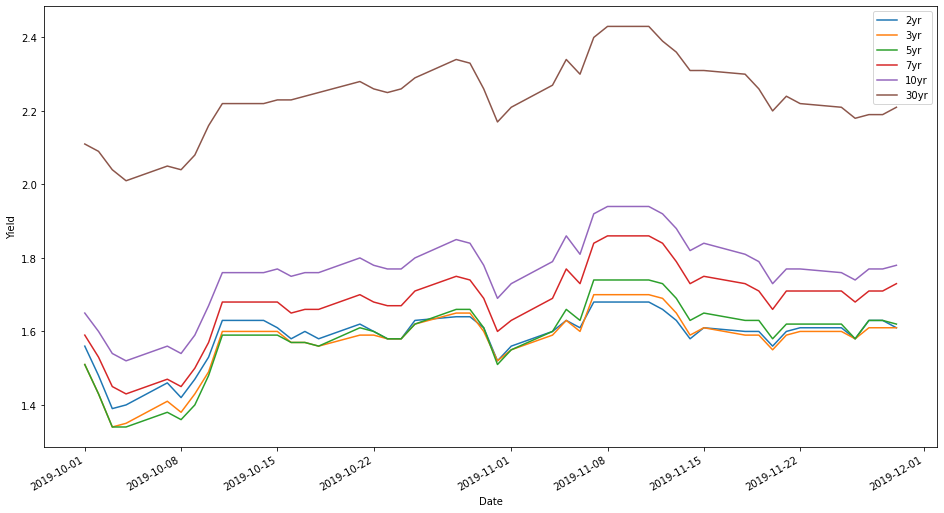

SPDR GOLD ETF and HSI Price over the period from 2019-10-01 to 2019-11-30



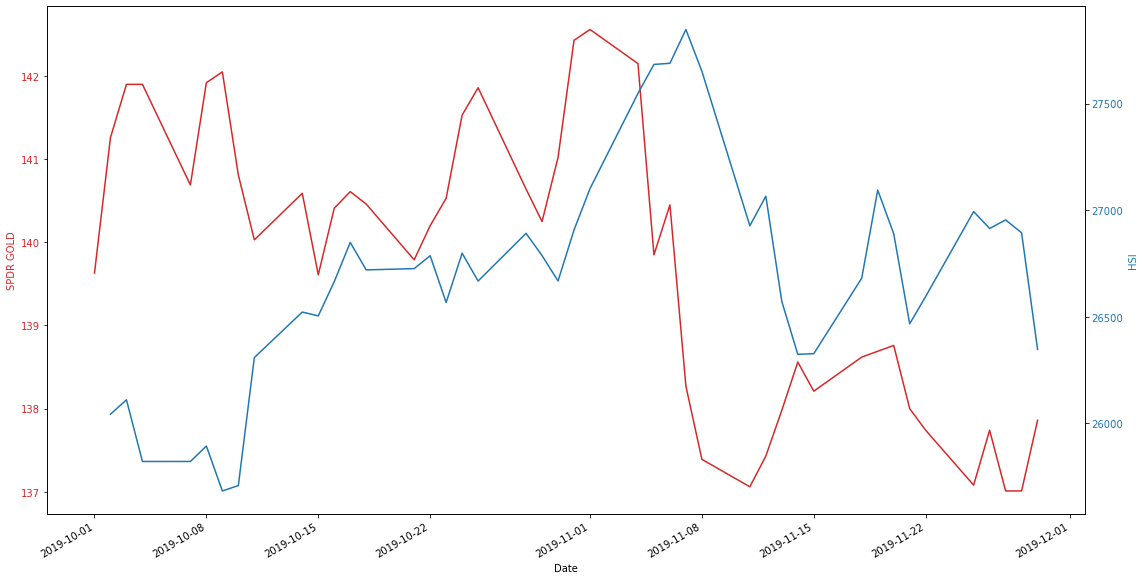

In [4]:
# Part 4
# Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend

#Fill Out the data during weekend for the US Treasury Bond
all_weekdays = pd.date_range(start='2019-10-01', end='2019-11-30', freq='B')
close_yc = yc.reindex(all_weekdays)
close_yc = close_yc.fillna(method='ffill')

fig, ax = plt.subplots(figsize=(16,9))


ax.set_xlabel('Date')
ax.set_ylabel('Yield')
ax.plot(close_yc,)
ax.tick_params(axis='y')
plt.legend(['2yr','3yr','5yr','7yr','10yr','30yr'])

fig.autofmt_xdate()

print("US Treasury Bond Yield over the period from 2019-10-01 to 2019-11-30\n")
plt.show()

# On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label
# On the same graph, plot the equity ETF prices (not returns!) for the 2 months.  Be sure to use a separate scale, and the right-side axis for the price label

#Fill Out the data during weekend for the GOlD ETF
close_GLD = GLD['Close']
all_weekdays = pd.date_range(start='2019-10-01', end='2019-11-30', freq='B')
close_GLD = close_GLD.reindex(all_weekdays)
close_GLD = close_GLD.fillna(method='ffill')

#Fill Out the data during weekend for the Equity ETF
close_HSI = HSI['Close']
all_weekdays = pd.date_range(start='2019-10-01', end='2019-11-30', freq='B')
close_HSI = close_HSI.reindex(all_weekdays)
close_HSI = close_HSI.fillna(method='ffill')

# Plot Gold and Equity 
fig, ax1 = plt.subplots(figsize=(16,9))


color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPDR GOLD', color=color)
ax1.plot(close_GLD, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('HSI', color=color)  
ax2.plot(close_HSI, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
fig.autofmt_xdate()
print("SPDR GOLD ETF and HSI Price over the period from 2019-10-01 to 2019-11-30\n")
plt.show()


In [5]:
# Part 5
# Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.

print("Nelson Siegel model\n")
print("f (t) = β0 + β1 * exp(-t / Ʈ) + β2 * exp(-t / Ʈ) * (-t / Ʈ)\n")
print("where, f (t): is the implied forward rate \n")
print("β0, β1, β2 and Ʈ : model parameters that are to be estimated. These are parameters respectively for long term rate, short term rate, slope and degree of hump.")

Nelson Siegel model

f (t) = β0 + β1 * exp(-t / Ʈ) + β2 * exp(-t / Ʈ) * (-t / Ʈ)

where, f (t): is the implied forward rate 

β0, β1, β2 and Ʈ : model parameters that are to be estimated. These are parameters respectively for long term rate, short term rate, slope and degree of hump.


ARMA(1,1)
yt = a1*yt-1 + m1*et-1 +et


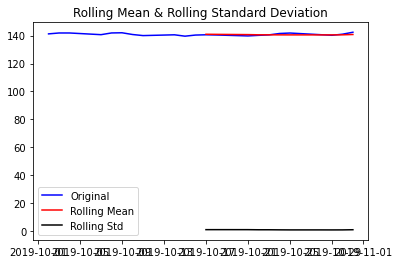

ADF Statistic: -20.034017049836766
p-value: 0.0
Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443

 The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series for the GOLD ETF in OCT 2019 is not stationary. 


In [6]:
# Part 6
# Using the October gold ETF prices, run an ARMA model with your choice of parameters.
print("ARMA(1,1)")
print("yt = a1*yt-1 + m1*et-1 +et")

# SPDR GOLD ETF OCT 
# Test if the data is stationary

rolling_mean = GLD_OCT['Close'].rolling(window = 12).mean()
rolling_std = GLD_OCT['Close'].rolling(window = 12).std()
plt.plot(GLD_OCT['Close'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

# ADF Test
result = adfuller(GLD_OCT['Close'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    
print("\n The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series for the GOLD ETF in OCT 2019 is not stationary. ")


    

                    